<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [185]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [186]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [187]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [188]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [189]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [190]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Пример создания признака.**

In [191]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [192]:
age_categories = [age_category(age) for age in data.Age]

In [193]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [194]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [195]:
# Ваш код здесь
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [196]:
# Ваш код здесь
data['Pclass'].value_counts()#.sort_values()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [197]:
# Ваш код здесь
pd.crosstab(data['Sex'], data['Pclass'], margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [198]:
# Ваш код здесь
pd.set_option('precision', 2)

In [199]:
# Ваш код здесь
data['Fare'].describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

In [200]:
# Ваш код здесь
#np.set_printoptions(precision=2)
data['Fare'].std()

49.693428597180905

In [201]:
# Ваш код здесь
data['Fare'].median()

14.4542

In [202]:
# Ваш код здесь
data['Fare'].count()

891

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [203]:
data[data['Age']<30]['Survived'].count()

384

In [204]:
data[data['Age']<30]['Survived'].mean()*100

40.625

In [205]:
data[data['Age']<30]['Survived'].value_counts(normalize=True)*100

0    59.38
1    40.62
Name: Survived, dtype: float64

In [206]:
data[data['Age']>60]['Survived'].count()

22

In [207]:
data[data['Age']>60]['Survived'].mean()*100

22.727272727272727

In [208]:
data[data['Age']>60]['Survived'].value_counts(normalize=True)*100

0    77.27
1    22.73
Name: Survived, dtype: float64

In [209]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_category
count,891.00,891.00,714.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20,1.81
std,0.49,0.84,14.53,1.10,0.81,49.69,0.80
min,0.00,1.00,0.42,0.00,0.00,0.00,1.00
25%,0.00,2.00,20.12,0.00,0.00,7.91,1.00
50%,0.00,3.00,28.00,0.00,0.00,14.45,2.00
75%,1.00,3.00,38.00,1.00,0.00,31.00,2.00
max,1.00,3.00,80.00,8.00,6.00,512.33,3.00


In [210]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Age_category  891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [211]:
data[data['Sex']=='male']['Survived'].count()

577

In [212]:
data[data['Sex']=='male']['Survived'].mean()*100

18.890814558058924

In [213]:
data[data['Sex']=='male']['Survived'].value_counts(normalize=True)*100

0    81.11
1    18.89
Name: Survived, dtype: float64

In [214]:
data[data['Sex']=='female']['Survived'].count()

314

In [215]:
data[data['Sex']=='female']['Survived'].mean()*100

74.20382165605095

In [216]:
data[data['Sex']=='female']['Survived'].value_counts(normalize=True)*100

1    74.2
0    25.8
Name: Survived, dtype: float64

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [217]:
# Ваш код здесь
def FirstName(Name):
    if 'Charles' in Name:
        return 'Charles'
    elif 'Thomas' in Name:
        return 'Thomas'
    elif 'William' in Name:
        return 'William'
    elif 'John' in Name:
        return 'John'
    return np.nan
    
data['FirstName'] = data['Name'].apply(FirstName)
data[data['Sex']=='male'].head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,FirstName
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,1,NaN
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,2,William
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q,3,NaN
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S,2,NaN
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S,1,NaN
13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.05,NaN,S,1,William
14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.27,NaN,S,2,NaN
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.12,NaN,Q,1,NaN
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S,3,Charles


In [218]:
# Ваш код здесь
data[data['Sex']=='male']['FirstName'].value_counts()#(normalize=True)

William    49
John       33
Charles    20
Thomas     15
Name: FirstName, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

In [219]:
# Ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

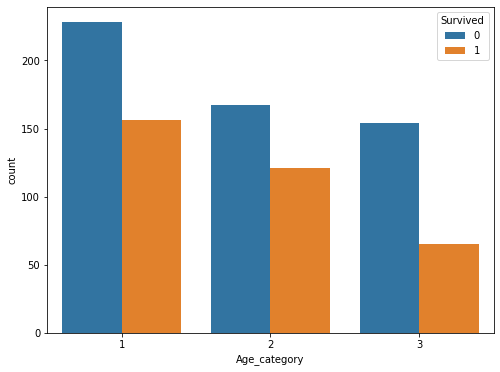

In [220]:
sns.countplot(x='Age_category', hue='Survived', data=data);
plt.savefig('int_Age_Survived.png', dpi=300);

In [221]:
def fare_category(fare):
    if fare < 8:
        return 1
    elif fare < 30:
        return 2
    else:
        return 3

In [222]:
data['Fare_category'] = data['Fare'].apply(fare_category)

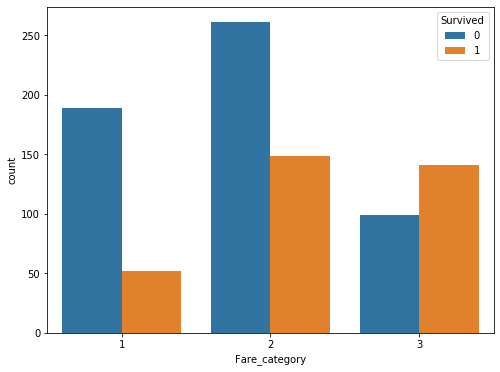

In [223]:
sns.countplot(x='Fare_category', hue='Survived', data=data);
plt.savefig('int_Fare_Survived.png', dpi=300);

In [224]:
data.groupby('Survived')[['Age','Fare']].mean()

,Age,Fare
Survived,,
0,30.63,22.12
1,28.34,48.40


In [225]:
data.groupby(['Survived'])[['Age','Fare']].agg(np.mean)

,Age,Fare
Survived,,
0,30.63,22.12
1,28.34,48.40


In [226]:
data.pivot_table(['Age','Fare'], ['Survived'], aggfunc=['mean','count'])

mean        count     
            Age   Fare   Age Fare
Survived                         
0         30.63  22.12   424  549
1         28.34  48.40   290  342

In [227]:
data.pivot_table(['Age','Fare'], ['Survived'], aggfunc='describe')

Age                                                Fare        \
           25%   50%   75%  count   max   mean   min    std    25%   50%   
Survived                                                                   
0         21.0  28.0  39.0  424.0  74.0  30.63  1.00  14.17   7.85  10.5   
1         19.0  28.0  36.0  290.0  80.0  28.34  0.42  14.95  12.47  26.0   

                                                  
           75%  count     max   mean  min    std  
Survived                                          
0         26.0  549.0  263.00  22.12  0.0  31.39  
1         57.0  342.0  512.33  48.40  0.0  66.60

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [228]:
# Ваш код здесь
data.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,38.23
2,29.88
3,25.14


In [229]:
# Ваш код здесь
data.groupby(['Pclass','Sex'])[['Age']].mean()

Age
Pclass Sex          
1      female  34.61
       male    41.28
2      female  28.72
       male    30.74
3      female  21.75
       male    26.51

In [230]:
data[(data['Sex']=='male') & (data['Pclass']==1)]['Age'].mean()

41.28138613861386